In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fastcampus_python/data/online_commerce_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


In [3]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


### 결측치 확인 및 데이터 전처리

In [4]:
# 각 컬럼별 결측치 수 확인
df.isnull().sum()

customer_no         0
age                38
gender              0
order_no            0
order_date          0
channel             0
item_category       0
item_code           0
item_name           0
price               0
qty                 0
order_amount        0
discount_amount     0
paid_amount         0
dtype: int64

In [5]:
# 결측치 데이터 확인
## Gender 결측치
df[df["age"].isnull()]

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
2479,2020042097533,NaN,9,202104014704079,2021/04/01,Mobile,일반식품,321981732,생수,3300,1,3300,0,3300
5977,2020120538186,NaN,9,202102051918006,2021/02/05,Mobile,일반식품,320105541,생수,5990,1,5990,0,5990
14980,2020110634881,NaN,9,202102122693785,2021/02/12,Mobile,일반식품,320105541,생수,6000,1,6000,0,6000
15457,2020042097533,NaN,9,202105011653115,2021/05/01,Mobile,일반식품,321981732,생수,3290,1,3290,0,3290
17504,2021027453851,NaN,9,202102010947124,2021/02/01,TV,일반식품,322547873,레드향세트,45900,1,45900,1000,44900
19449,2020112450611,NaN,9,202104135050983,2021/04/13,Mobile,뷰티,323354139,클렌징,9500,1,9500,1900,7600
26536,2021017055884,NaN,9,202102074293785,2021/02/07,TV,주방용품,322062185,자동회전냄비,109000,1,109000,19900,89100
30855,2021027657719,NaN,9,202102029259913,2021/02/02,Mobile,일반식품,320077263,생수,3900,1,3900,0,3900
35200,2021028999862,NaN,9,202103013140709,2021/03/01,TV,건강식품,321973170,아보카도오일,154000,1,154000,35400,118600
37517,2018036758656,NaN,9,202101189618716,2021/01/18,TV,일반식품,322547725,손질새우,60900,1,60900,7090,53810


In [6]:
## 999로 결측치 대체
df["age"] = df["age"].fillna(999)
df.isnull().sum()

customer_no        0
age                0
gender             0
order_no           0
order_date         0
channel            0
item_category      0
item_code          0
item_name          0
price              0
qty                0
order_amount       0
discount_amount    0
paid_amount        0
dtype: int64

### 날짜 데이터 전처리

In [7]:
# 날짜 데이터 전처리
df["order_date"] = pd.to_datetime(df["order_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_no      147311 non-null  int64         
 1   age              147311 non-null  float64       
 2   gender           147311 non-null  int64         
 3   order_no         147311 non-null  int64         
 4   order_date       147311 non-null  datetime64[ns]
 5   channel          147311 non-null  object        
 6   item_category    147311 non-null  object        
 7   item_code        147311 non-null  int64         
 8   item_name        147311 non-null  object        
 9   price            147311 non-null  int64         
 10  qty              147311 non-null  int64         
 11  order_amount     147311 non-null  int64         
 12  discount_amount  147311 non-null  int64         
 13  paid_amount      147311 non-null  int64         
dtypes: datetime64[ns](1)

In [8]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


In [9]:
print(df['order_date'].min())
print(df['order_date'].max())

2021-01-01 00:00:00
2021-06-24 00:00:00


### 시간 가중치를 미적용 - 유저별 최다 구매 아이템 구하기

In [10]:
## 유저 단위로 아이템별 구매 건수 구하기
user_summary = df.groupby(['customer_no', 'item_name'])['order_no'].nunique().reset_index()
user_summary = user_summary.rename(columns={'order_no': 'cnt_order'})
user_summary.head(10)

,customer_no,item_name,cnt_order
0,2015010000596,도가니탕,1
1,2015010000596,혈당/혈압측정기,1
2,2015010000652,이온음료,1
3,2015010001152,닭고기(계육),1
4,2015010001152,도가니탕,2
5,2015010001152,사과,1
6,2015010001152,오메가3,1
7,2015010001152,크리스피롤,1
8,2015010001213,유산균,1
9,2015010001954,기모팬츠,1


In [11]:
## 구매 건수가 많은 아이템별로 순위 매기기
user_summary['rn'] = user_summary.sort_values(by='cnt_order', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_summary.head(10)

,customer_no,item_name,cnt_order,rn
0,2015010000596,도가니탕,1,1
1,2015010000596,혈당/혈압측정기,1,2
2,2015010000652,이온음료,1,1
3,2015010001152,닭고기(계육),1,5
4,2015010001152,도가니탕,2,1
5,2015010001152,사과,1,4
6,2015010001152,오메가3,1,3
7,2015010001152,크리스피롤,1,2
8,2015010001213,유산균,1,1
9,2015010001954,기모팬츠,1,1


In [12]:
## 최다 구매 아이템 정보만 남기기
user_max_item_info = user_summary[user_summary['rn'] == 1].reset_index(drop = True)
user_max_item_info.head()

,customer_no,item_name,cnt_order,rn
0,2015010000596,도가니탕,1,1
1,2015010000652,이온음료,1,1
2,2015010001152,도가니탕,2,1
3,2015010001213,유산균,1,1
4,2015010001954,기모팬츠,1,1


### Time Decay를 적용 - 유저별 최선호 아이템 구하기

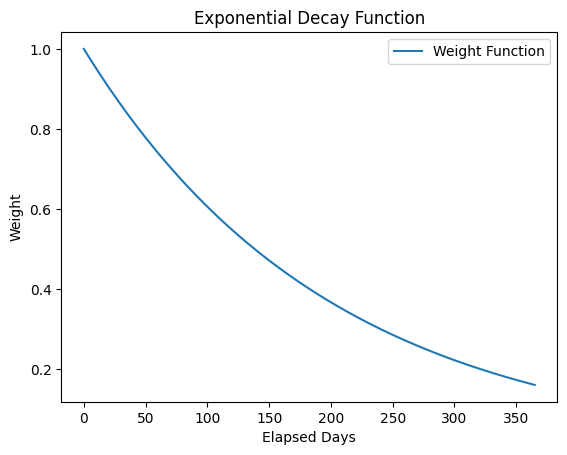

In [13]:
# Time Decay Concept

import matplotlib.pyplot as plt
import numpy as np

# 경과일수 생성 (예: 0부터 365까지의 경과일수)
elapsed_days = np.arange(0, 366, 1)

# 가중치 계산 (0.995^경과일수)
weights = 0.995**elapsed_days

# 그래프 그리기
plt.plot(elapsed_days, weights, label='Weight Function')
plt.title('Exponential Decay Function')
plt.xlabel('Elapsed Days')
plt.ylabel('Weight')
plt.legend()
plt.show()

단순히 그동안 구매건수를 더하는 것이 아니라, 추천을 수행하는 시간 기준으로 오래된 구매일수록 decay를 적용

In [14]:
# 추천을 제공하는 날짜가 이 데이터의 가장 마지막 구매 일자의 다음 날이라고 가정
recommend_ymd = df['order_date'].max() + pd.Timedelta(days=1)
print(recommend_ymd)

2021-06-25 00:00:00


In [15]:
## 유저별 데이터 집계
decay_summary = df.groupby(['customer_no', 'order_date', 'item_name'])['order_no'].nunique().reset_index()
decay_summary = decay_summary.rename(columns={'order_no': 'cnt_order'})
decay_summary.head(10)

,customer_no,order_date,item_name,cnt_order
0,2015010000596,2021-01-15,도가니탕,1
1,2015010000596,2021-06-03,혈당/혈압측정기,1
2,2015010000652,2021-03-06,이온음료,1
3,2015010001152,2021-02-13,도가니탕,1
4,2015010001152,2021-02-18,도가니탕,1
5,2015010001152,2021-03-02,닭고기(계육),1
6,2015010001152,2021-03-23,사과,1
7,2015010001152,2021-04-24,오메가3,1
8,2015010001152,2021-05-25,크리스피롤,1
9,2015010001213,2021-02-25,유산균,1


In [16]:
## 파라미터 설정
day_parameter = 0.995

## Time Decay 적용 컬럼 생성
decay_summary['decay_day'] = day_parameter ** ((recommend_ymd - decay_summary['order_date']).dt.days)
decay_summary.head(10)

,customer_no,order_date,item_name,cnt_order,decay_day
0,2015010000596,2021-01-15,도가니탕,1,0.446186
1,2015010000596,2021-06-03,혈당/혈압측정기,1,0.895587
2,2015010000652,2021-03-06,이온음료,1,0.573274
3,2015010001152,2021-02-13,도가니탕,1,0.515996
4,2015010001152,2021-02-18,도가니탕,1,0.529092
5,2015010001152,2021-03-02,닭고기(계육),1,0.561894
6,2015010001152,2021-03-23,사과,1,0.624266
7,2015010001152,2021-04-24,오메가3,1,0.732877
8,2015010001152,2021-05-25,크리스피롤,1,0.856082
9,2015010001213,2021-02-25,유산균,1,0.547986


In [17]:
## decay_day 집계
user_decay_summary = decay_summary.groupby(['customer_no', 'item_name']).agg(cnt_order = ('cnt_order', 'sum'),
                                                                             decay_day = ('decay_day', 'sum')).reset_index()

user_decay_summary.head(10)

,customer_no,item_name,cnt_order,decay_day
0,2015010000596,도가니탕,1,0.446186
1,2015010000596,혈당/혈압측정기,1,0.895587
2,2015010000652,이온음료,1,0.573274
3,2015010001152,닭고기(계육),1,0.561894
4,2015010001152,도가니탕,2,1.045088
5,2015010001152,사과,1,0.624266
6,2015010001152,오메가3,1,0.732877
7,2015010001152,크리스피롤,1,0.856082
8,2015010001213,유산균,1,0.547986
9,2015010001954,기모팬츠,1,0.564717


In [18]:
## decay_day 값이 큰 아이템별로 순위 매기기
user_decay_summary['rn'] = user_decay_summary.sort_values(by='decay_day', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_decay_summary.head(10)

,customer_no,item_name,cnt_order,decay_day,rn
0,2015010000596,도가니탕,1,0.446186,2
1,2015010000596,혈당/혈압측정기,1,0.895587,1
2,2015010000652,이온음료,1,0.573274,1
3,2015010001152,닭고기(계육),1,0.561894,5
4,2015010001152,도가니탕,2,1.045088,1
5,2015010001152,사과,1,0.624266,4
6,2015010001152,오메가3,1,0.732877,3
7,2015010001152,크리스피롤,1,0.856082,2
8,2015010001213,유산균,1,0.547986,1
9,2015010001954,기모팬츠,1,0.564717,1


In [19]:
## Time decay 적용한 최선호 구매 아이템 정보만 남기기
user_decay_item_info = user_decay_summary[user_decay_summary['rn'] == 1].reset_index(drop = True)
user_decay_item_info.head()

,customer_no,item_name,cnt_order,decay_day,rn
0,2015010000596,혈당/혈압측정기,1,0.895587,1
1,2015010000652,이온음료,1,0.573274,1
2,2015010001152,도가니탕,2,1.045088,1
3,2015010001213,유산균,1,0.547986,1
4,2015010001954,기모팬츠,1,0.564717,1


### 시간 가중치 미적용과 Time Decay 적용 데이터 비교

In [20]:
# 두 데이터프레임 조인
merge_df = pd.merge(user_max_item_info, user_decay_item_info, on=['customer_no', 'rn'])

# 컬럼명 변경
merge_df = merge_df.rename(columns={'item_name_x': 'max_item_name', 'cnt_order_x': 'max_cnt_order',
                                    'item_name_y': 'decay_item_name', 'cnt_order_y': 'decay_cnt_order'})

merge_df.head(10)

,customer_no,max_item_name,max_cnt_order,rn,decay_item_name,decay_cnt_order,decay_day
0,2015010000596,도가니탕,1,1,혈당/혈압측정기,1,0.895587
1,2015010000652,이온음료,1,1,이온음료,1,0.573274
2,2015010001152,도가니탕,2,1,도가니탕,2,1.045088
3,2015010001213,유산균,1,1,유산균,1,0.547986
4,2015010001954,기모팬츠,1,1,기모팬츠,1,0.564717
5,2015010004299,로봇청소기,1,1,로봇청소기,1,0.697047
6,2015010004451,패딩점퍼,1,1,여름팬츠,1,0.913725
7,2015010005813,기타 간편/즉석식품,1,1,기타 간편/즉석식품,1,0.834893
8,2015010008884,백미(쌀),3,1,백미(쌀),3,1.679469
9,2015010009464,티셔츠,1,1,티셔츠,1,0.900087


In [21]:
# 'rn' 컬럼의 위치 조정
merge_df = merge_df[['customer_no', 'rn', 'max_item_name', 'max_cnt_order', 'decay_item_name', 'decay_cnt_order', 'decay_day']]
merge_df.head(10)

,customer_no,rn,max_item_name,max_cnt_order,decay_item_name,decay_cnt_order,decay_day
0,2015010000596,1,도가니탕,1,혈당/혈압측정기,1,0.895587
1,2015010000652,1,이온음료,1,이온음료,1,0.573274
2,2015010001152,1,도가니탕,2,도가니탕,2,1.045088
3,2015010001213,1,유산균,1,유산균,1,0.547986
4,2015010001954,1,기모팬츠,1,기모팬츠,1,0.564717
5,2015010004299,1,로봇청소기,1,로봇청소기,1,0.697047
6,2015010004451,1,패딩점퍼,1,여름팬츠,1,0.913725
7,2015010005813,1,기타 간편/즉석식품,1,기타 간편/즉석식품,1,0.834893
8,2015010008884,1,백미(쌀),3,백미(쌀),3,1.679469
9,2015010009464,1,티셔츠,1,티셔츠,1,0.900087


In [22]:
# 두 기준으로 추출한 선호 아이템이 다른 유저만 Filtering
diff_prefer_user = merge_df[merge_df['max_item_name'] != merge_df['decay_item_name']].reset_index(drop=True)
diff_prefer_user.sort_values(by='decay_day', ascending=False).head(50)

,customer_no,rn,max_item_name,max_cnt_order,decay_item_name,decay_cnt_order,decay_day
1158,2019074989618,1,일반세탁기,48,냉장고/냉동고,47,26.616036
1301,2019107337438,1,냉장고/냉동고,41,일반세탁기,39,23.508775
1157,2019074946712,1,냉장고/냉동고,48,일반세탁기,37,22.307060
1539,2020020542088,1,드럼세탁기,44,LED TV,42,13.791983
1709,2020046258294,1,핸디형청소기,17,일반압력밥솥,16,12.349917
1983,2020091115557,1,오메가3,47,남성건강기능식품,28,11.261258
1962,2020089023959,1,핸디형청소기,16,일반압력밥솥,13,10.783759
1719,2020047423925,1,루테인,35,오메가3,18,10.008312
1963,2020089024626,1,핸디형청소기,13,일반압력밥솥,11,9.576470
2107,2020113745154,1,곰탕/도가니탕,140,즉석국,50,7.089177


### 실무 사례

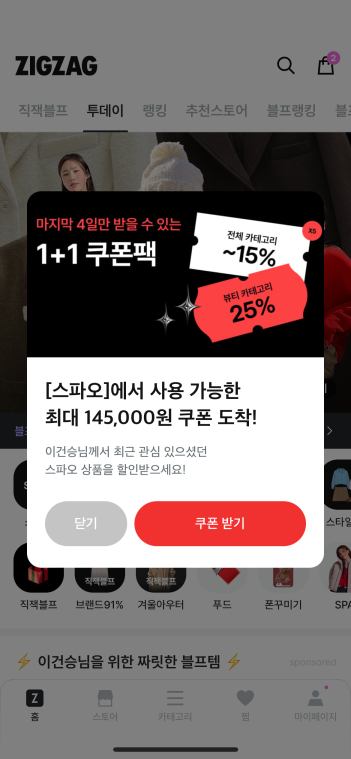

In [23]:
import os
import glob
import cv2
from google.colab.patches import cv2_imshow
image = '/content/drive/MyDrive/fastcampus_python/class02/IMG_3132.PNG'
img = cv2.imread(image)

# 이미지 축소 비율 설정
scale_percent = 30  # 30%로 축소

# 이미지 크기 조정
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized_img)